# Thi kết thúc môn

## Thông tin học viên:
Họ và tên: Hồ Sĩ An Sơn
Lớp: MSE#11HCM
Mã Hv: 22MSE23060

# 1. (15 marks) – Image Histogram and Equalization

## a) Plot the original image and its histogram. Save this image as ‘Color_Histogram.jpeg

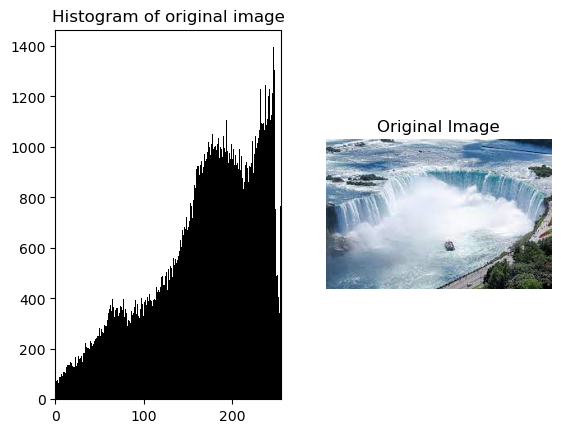

In [52]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os

# Load the image
image_path = './Data/Ex1.jfif'
image = Image.open(image_path)

# Convert image into a numpy array
image_array = np.array(image)

# Split the image into its respective bands, R, G, B
r, g, b = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]

# Plot the original image
fig, ax = plt.subplots(1, 2)

# Histogram
# Flatten the arrays and combine them into a single array for the histogram
rgb_array = np.concatenate((r.flatten(), g.flatten(), b.flatten()))
ax[0].hist(rgb_array, bins=256, color='black', alpha=1)
ax[0].set_title('Histogram of original image')
ax[0].set_xlim([0, 255])

# Original image
ax[1].imshow(image)
ax[1].set_title('Original Image')
ax[1].axis('off')

# Save the figure
output_path = './Results/Color_Histogram.jpeg'
fig.savefig(output_path, bbox_inches='tight')


## (b) Display three primary components Red, Green and Blue of the original image. Recombine them in Blue, Red, Green order. Plot these images in the same figure and save as ‘Primary_Colors_and_BRG_Image.jpeg’

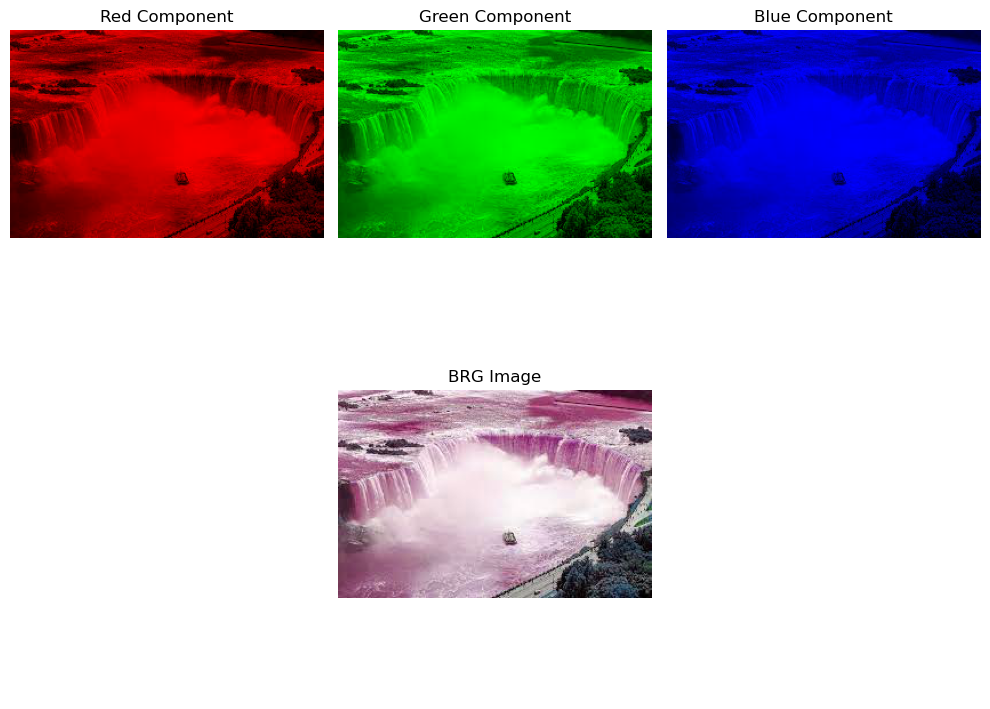

In [53]:
# Create zero matrices for the empty color channels
zeros = np.zeros(image_array.shape[:2], dtype="uint8")

# Create the Red, Green, Blue components with the respective channels
red_image = np.stack((r, zeros, zeros), axis=2)
green_image = np.stack((zeros, g, zeros), axis=2)
blue_image = np.stack((zeros, zeros, b), axis=2)

# Recombine them in Blue, Red, Green order
brg_image = np.stack((b, r, g), axis=2)

# Plot the color components and the recombined image
fig, ax = plt.subplots(2, 3, figsize=(10, 8))

# Red component
ax[0, 0].imshow(red_image)
ax[0, 0].set_title('Red Component')
ax[0, 0].axis('off')

# Green component
ax[0, 1].imshow(green_image)
ax[0, 1].set_title('Green Component')
ax[0, 1].axis('off')

# Blue component
ax[0, 2].imshow(blue_image)
ax[0, 2].set_title('Blue Component')
ax[0, 2].axis('off')

# BRG Image
ax[1, 0].axis('off')
ax[1, 2].axis('off')
ax[1, 1].imshow(brg_image)
ax[1, 1].set_title('BRG Image')
ax[1, 1].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
output_path_brg = './Results/Primary_Colors_and_BRG_Image.jpeg'
fig.savefig(output_path_brg, bbox_inches='tight')


## c) Apply histogram equalization for the original image. Plot the image and its histogram after being equalized. Save this figure as ‘Equalization_Histogram.jpeg’

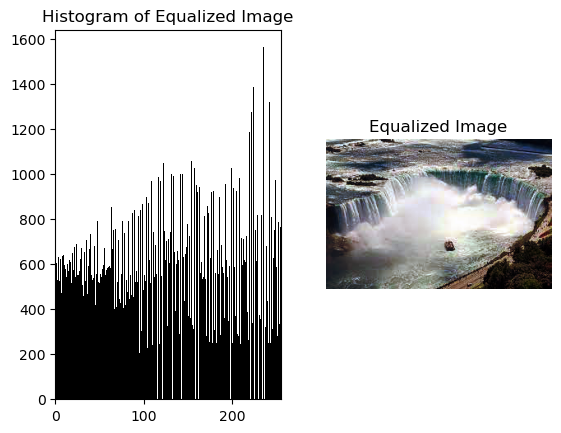

In [54]:
from skimage import exposure

# Apply histogram equalization to each color channel
equalized_r = exposure.equalize_hist(image_array[:, :, 0])
equalized_g = exposure.equalize_hist(image_array[:, :, 1])
equalized_b = exposure.equalize_hist(image_array[:, :, 2])
# Stack the channels back together
equalized_image_corrected = np.stack((equalized_r, equalized_g, equalized_b), axis=-1)

# Convert the equalized image to uint8 to display it with matplotlib
equalized_image_corrected_uint8 = (255 * equalized_image_corrected).astype(np.uint8)

# Flatten the equalized image array for histogram plotting
equalized_corrected_rgb_array = np.concatenate((equalized_image_corrected_uint8[:, :, 0].flatten(),
                                                equalized_image_corrected_uint8[:, :, 1].flatten(),
                                                equalized_image_corrected_uint8[:, :, 2].flatten()))

# Plot the equalized image and its histogram
fig, ax = plt.subplots(1, 2)

# Histogram of the equalized image
ax[0].hist(equalized_corrected_rgb_array, bins=256, color='black', alpha=1)
ax[0].set_title('Histogram of Equalized Image')
ax[0].set_xlim([0, 255])

# Equalized image
ax[1].imshow(equalized_image_corrected_uint8)
ax[1].set_title('Equalized Image')
ax[1].axis('off')

# Save the figure with the corrected histogram equalization
output_path_eq_corrected = './Results/Equalization_Histogram.jpeg'
fig.savefig(output_path_eq_corrected, bbox_inches='tight')



# 2. (25 marks) – Object Counting

## a) Read and display the original image

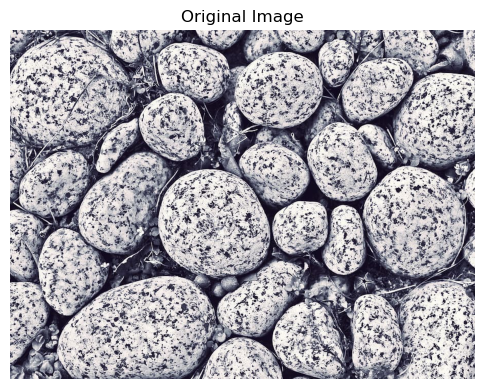

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation, diamond
from scipy.ndimage import binary_fill_holes
from skimage.measure import label, regionprops

# Load the image
original_image = imread('./Data/Ex2.jpg')

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()


## (b) Binarize the original image using Otsu method and display the binary image.

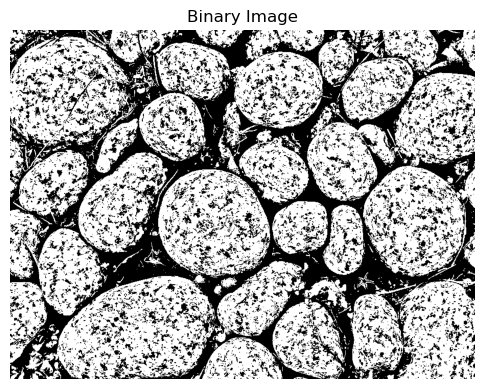

In [3]:
# Convert the image to grayscale
gray_image = rgb2gray(original_image)

# Binarize the image using Otsu's threshold
thresh = threshold_otsu(gray_image)
binary_image = gray_image > thresh

# Display the binary image
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()


## c) Fill small holes in the binary image and display the filled image.

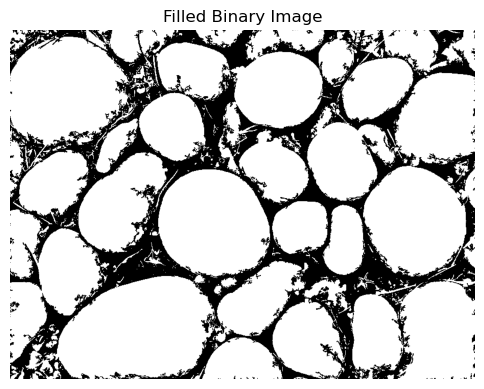

In [4]:
# Fill the small holes in the binary image
filled_image = binary_fill_holes(binary_image)

# Display the filled binary image
plt.figure(figsize=(6, 6))
plt.imshow(filled_image, cmap='gray')
plt.title('Filled Binary Image')
plt.axis('off')
plt.show()


## (d) Perform the erosion on the binary image using a diamond structuring element with size = 1

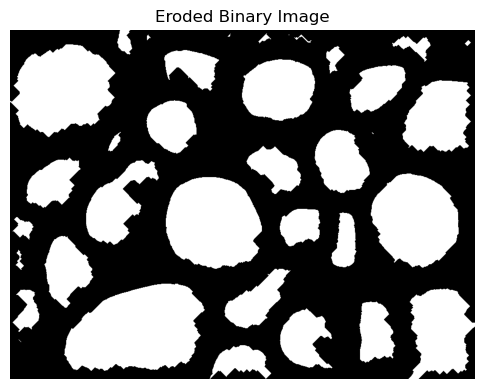

In [5]:
# Create a diamond structuring element with size 15
structuring_element = diamond(15)

# Erode the filled binary image
eroded_image = binary_erosion(filled_image, structuring_element)

# Display the eroded image
plt.figure(figsize=(6, 6))
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Binary Image')
plt.axis('off')
plt.show()


## (e) Apply region labeling on the eroded image to count number of stones in the original image. Print the result on the screen

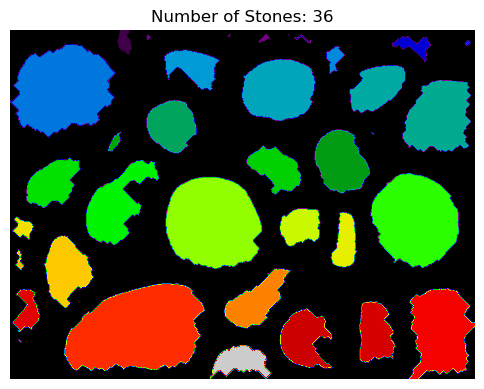

36

In [6]:
# Apply region labeling to count the number of stones
label_image, number_of_stones = label(eroded_image, return_num=True)

# Display the labeled image
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')
plt.title(f'Number of Stones: {number_of_stones}')
plt.axis('off')
plt.show()

number_of_stones


# 3. (20 marks) – Denoise and Deblur a Noisy Blurry Grayscale Image

## a) Read and display the original image

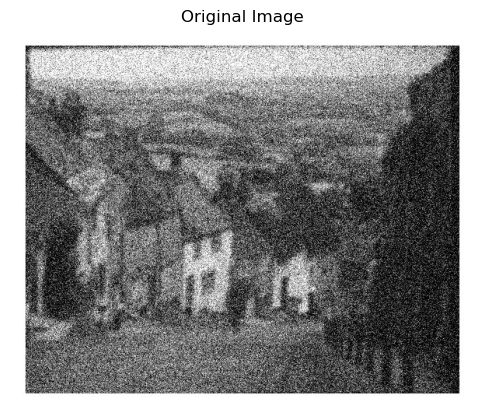

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image_path = './Data/Ex3.png'
original_image = Image.open(image_path).convert('L')
original_array = np.array(original_image)

# Display the original image
plt.figure(figsize=(6, 5))
plt.imshow(original_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


## (b) Method 1: Apply a denoise filter (default averaging kernel filter) then a sharpening filter (h = [0, -1, 0; -1, 5, -1; 0, -1, 0]) to the original image. Display the restored image.

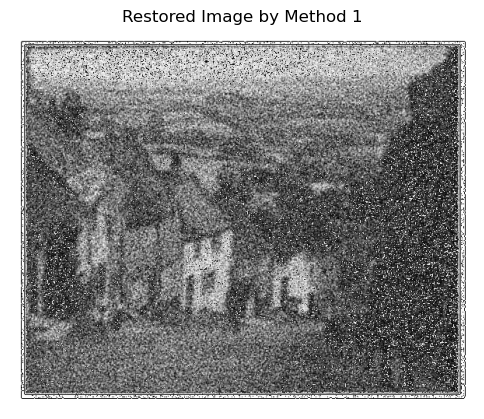

In [8]:
from scipy.ndimage import convolve, gaussian_filter

# Define the averaging kernel for denoising
kernel_average = np.ones((3, 3)) / 9

# Denoise the image
denoised_image = convolve(original_array, kernel_average)

# Define the sharpening kernel
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply sharpening
sharpened_image = convolve(denoised_image, kernel_sharpen)

# Display the denoised and sharpened image
plt.figure(figsize=(6, 5))
plt.imshow(sharpened_image, cmap='gray')
plt.title('Restored Image by Method 1')
plt.axis('off')
plt.show()


## (c) Method 2: Apply the Wiener filter to denoise and deblur the original image. Assume the Gaussian noise variance of the original image is σ=0.2. The estimated noise is calculated by the noise variance divided by the variance of the original image. The sharpening filter using the same with question b. Display the restored image

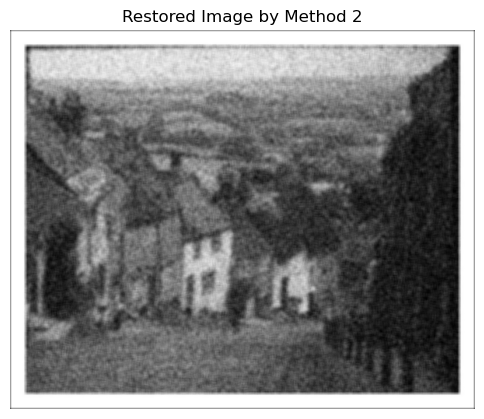

In [9]:
from scipy.signal import wiener

# Apply the Wiener filter to denoise and deblur
wiener_image = wiener(original_array, (5, 5), noise=0.2)

# Display the denoised and deblurred image using Wiener filter
plt.figure(figsize=(6, 5))
plt.imshow(wiener_image, cmap='gray')
plt.title('Restored Image by Method 2')
plt.axis('off')
plt.show()


## (d) Perform the root mean square (rms) calculation in two methods between the restored image and the original image.


In [10]:
def calculate_rms(original, restored):
    return np.sqrt(np.mean((original - restored) ** 2))

# Calculate RMS for both methods
rms_method1 = calculate_rms(original_array, sharpened_image)
rms_method2 = calculate_rms(original_array, wiener_image)

rms_method1, rms_method2


(9.582239591196135, 42.2703619561247)

# 4. (25 marks) – Edge Detection and Hough Transform

## (a) Read and display the original image in color and grayscale format.

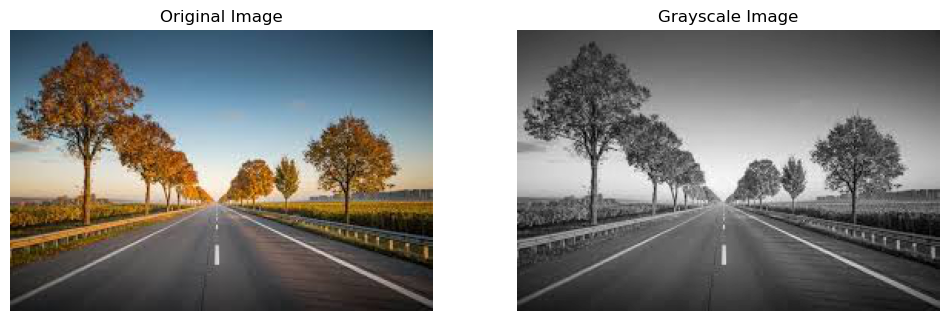

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import roberts, sobel
from scipy.ndimage import gaussian_filter
from skimage import feature
from skimage.transform import hough_line, hough_line_peaks

# Load the image
img_path = './Data/Ex4.jpg'
img = Image.open(img_path)
img_array = np.array(img)

# Convert to grayscale
gray_img_array = rgb2gray(img_array)

# Display original and grayscale image
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_array)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gray_img_array, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')
plt.show()


## (b) Apply Roberts filter in two directions (horizontal and vertical). Display the logarithm of sum of edge magnitude response with a threhold value = 4000. Then, display the binary image based on  this threshold

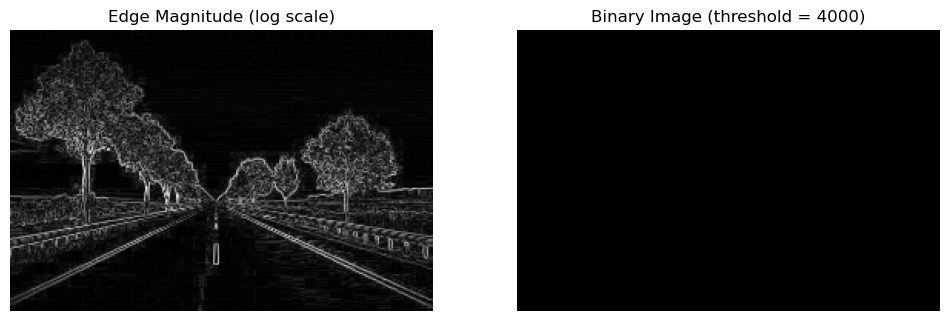

In [12]:
# Apply Roberts filter
edge_roberts = roberts(gray_img_array)

# Calculate logarithm of the sum of edge magnitude and create a binary image with a threshold
log_edge_roberts = np.log1p(edge_roberts)
binary_image = log_edge_roberts > np.log1p(4000)

# Display edge magnitude and binary image
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(log_edge_roberts, cmap='gray')
axes[0].set_title('Edge Magnitude (log scale)')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binary Image (threshold = 4000)')
axes[1].axis('off')
plt.show()


## (c) Apply Canny Edge Detector using a standard deviation 𝜎 = 1/ 4√2 and a threshold value = 0.2.

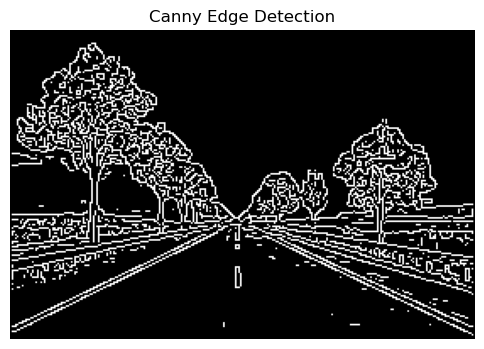

In [13]:
# Apply Canny edge detection with specified sigma
sigma_value = 1 / np.sqrt(2)
edges_canny = feature.canny(gray_img_array, sigma=sigma_value, low_threshold=0.2)

# Display Canny edge detection result
plt.figure(figsize=(6, 6))
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


## d) Apply Hough Transform using a ratio = 0.8 of max peak.

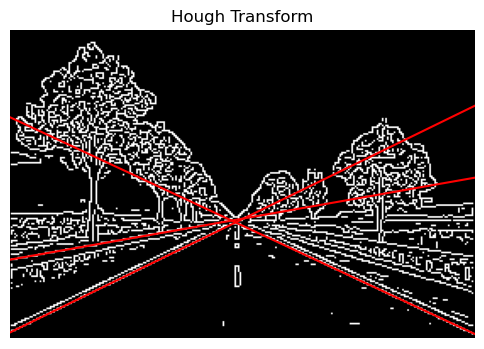

In [14]:
# Apply Hough Transform
h, theta, d = hough_line(edges_canny)
_, angles, dists = hough_line_peaks(h, theta, d, threshold=0.8*np.max(h))

# Display Hough Transform result
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(edges_canny, cmap='gray')
ax.set_ylim((edges_canny.shape[0], 0))
ax.set_xlim((0, edges_canny.shape[1]))
ax.set_axis_off()
ax.set_title('Hough Transform')

for angle, dist in zip(angles, dists):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.plot((x0 - 1000*np.sin(angle), x0 + 1000*np.sin(angle)),
            (y0 + 1000*np.cos(angle), y0 - 1000*np.cos(angle)), 'r')

plt.show()


# 5. (15 marks) – Key point Detection

## a) Read and display the original image in color and grayscale format.

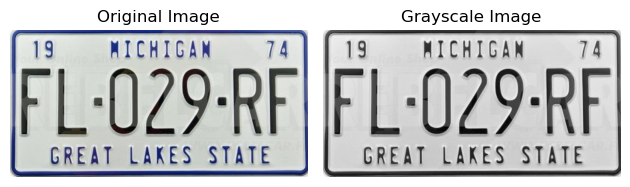

In [60]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = './Data/Ex5.jpg'
original_image = Image.open(image_path)
img_gray = Image.open(image_path).convert('L')

fig, ax = plt.subplots(1, 2)

# Original image
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


In [62]:
import math

img_array = np.array(original_image)

# Define the logarithm transformation function
def logarithm_transformation(r, c):
    return c * np.log(1 + r)

# Define the piecewise linear transformation function
def piecewise_linear_transformation(r):
    if r <= 93:
        return 2 * r + 10
    elif r <= 168:
        return r - 5
    elif r <= 214:
        return r
    else:
        return 255

# Calculate the constant c for logarithm transformation
c = 256 / math.log(512)

# Apply the logarithm transformation
log_transformed = logarithm_transformation(original_image, c).astype(np.uint8)


TypeError: unsupported operand type(s) for +: 'int' and 'JpegImageFile'